#Category-3  Predictive Analysis Question

In [1]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set(style="whitegrid")

In [5]:
import pandas as pd

df_demo = pd.read_excel(
    r"C:\Users\varle\Downloads\final clean data for py_hac\cleaned_schema_1_data_Final (1).xlsx"
)
df_demo.head()

,month,fsa,probable,vulnerable,is_most_recent,fever_chills_shakes,cough,shortness_of_breath,any_medical_conditions,travel_outside_canada,contact_with_illness,age_1,age_binary
0,April,L4C,0,0,1,0,0,0,0,0,0,<65,0
1,April,P1H,1,1,1,0,0,0,1,0,1,>65,1
2,April,N2J,0,1,1,0,0,0,0,0,0,>65,1
3,April,N1G,0,0,1,0,0,0,0,0,0,<65,0
4,April,L3M,0,0,1,0,0,0,0,0,0,<65,0


# Question 1
  How many people with fever tested COVID-positive compared to people without fever?

# Reasoning 

Fever is a common COVID symptom.
By comparing how many people with and without fever tested positive, we can understand whether fever is a strong indicator of COVID infection.

In [8]:
import matplotlib.pyplot as plt

In [11]:
# Filter only COVID-positive cases
covid_positive_df = df_demo[df_demo['probable'] == 1]


In [12]:
# Count COVID-positive people by fever status
fever_counts = covid_positive_df.groupby('fever_chills_shakes').size()

In [13]:
# Rename index for clarity
fever_counts.index = ['No Fever', 'Fever']

In [14]:
# Display counts
print(fever_counts)


No Fever    9324
Fever       2239
dtype: int64


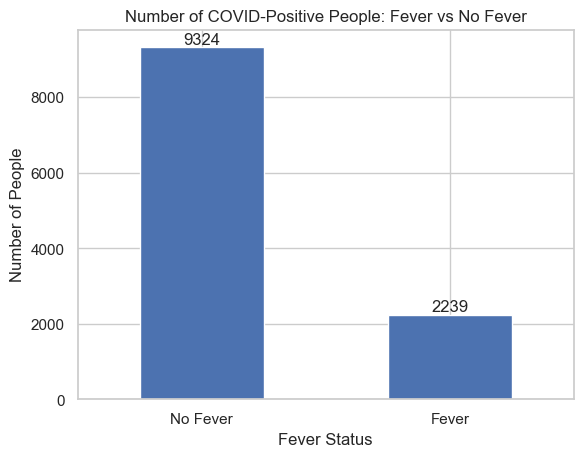

In [16]:
# Filter COVID-positive (probable) cases
covid_positive_df = df_demo[df_demo['probable'] == 1]

# Count by fever status
fever_counts = covid_positive_df.groupby('fever_chills_shakes').size()
fever_counts.index = ['No Fever', 'Fever']

# Plot
ax = fever_counts.plot(kind='bar',
                       title='Number of COVID-Positive People: Fever vs No Fever')

plt.xlabel('Fever Status')
plt.ylabel('Number of People')
plt.xticks(rotation=0)

# Add count labels on top of bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2,
            height,
            f'{int(height)}',
            ha='center',
            va='bottom')

plt.show()

In [ ]:
# Insight
The chart shows that among COVID-positive cases, 9,324 people did not report fever, while 2,239 people reported having fever.
This indicates that although fever is a known symptom of COVID-19, a large number of infected individuals did not experience fever, suggesting that relying on fever alone for COVID screening may miss many positive cases.

# Question :2
  How does COVID positivity change as the number of symptoms increases?

In [20]:
# Define symptom columns
symptoms = ['fever_chills_shakes', 'cough', 'shortness_of_breath']

# Count number of symptoms per person
df_demo['symptom_count'] = df_demo[symptoms].sum(axis=1)

# Calculate COVID positivity percentage by symptom count
positivity_table = (
    df_demo.groupby('symptom_count')['probable']
    .mean()
    .mul(100)
    .round(2)
    .reset_index()
)

# Rename columns for clarity
positivity_table.columns = ['Number of Symptoms', 'COVID Positivity (%)']

positivity_table

,Number of Symptoms,COVID Positivity (%)
0,0,1.98
1,1,37.91
2,2,100.00
3,3,100.00


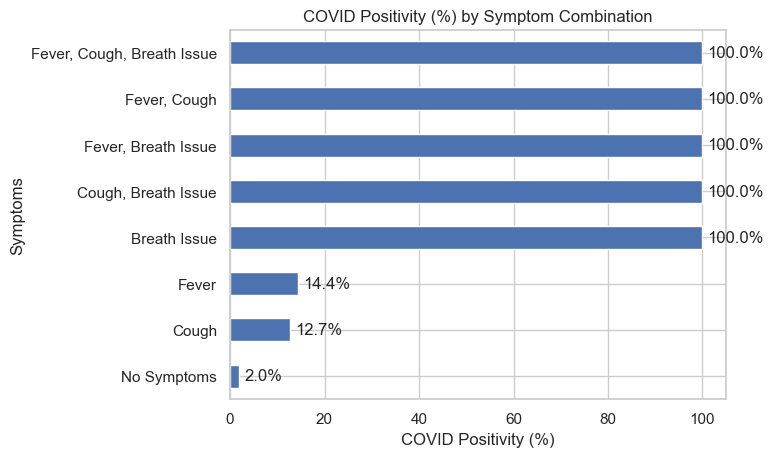

In [19]:
import matplotlib.pyplot as plt

# (Assuming symptom_label_rate already exists)
# symptom_label_rate = df_demo.groupby('symptom_label')['probable'].mean() * 100

# Plot horizontal bar chart
ax = symptom_label_rate.plot(kind='barh',
                             title='COVID Positivity (%) by Symptom Combination')

plt.xlabel('COVID Positivity (%)')
plt.ylabel('Symptoms')

# Add percentage labels to bars
for bar in ax.patches:
    width = bar.get_width()
    ax.text(width + 1,                     # position slightly right of bar
            bar.get_y() + bar.get_height()/2,
            f'{width:.1f}%',               # format as percentage
            va='center')

plt.show()











#Insight 

This is chart shows clearly COVID positivity increases sharply with symptom combinations, while single symptoms like cough alone show much lower positivity rates.

In [ ]:
# Question 3
 How many COVID-positive cases are seen for each number of symptoms?

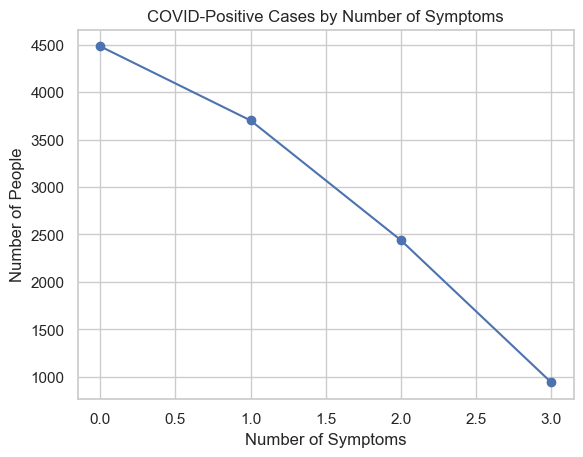

In [21]:
symptoms = ['fever_chills_shakes', 'cough', 'shortness_of_breath']
df_demo['symptom_count'] = df_demo[symptoms].sum(axis=1)

symptom_counts = df_demo[df_demo['probable'] == 1].groupby('symptom_count').size()

ax = symptom_counts.plot(kind='line', marker='o',
                          title='COVID-Positive Cases by Number of Symptoms')
plt.xlabel('Number of Symptoms')
plt.ylabel('Number of People')
plt.show()

In [22]:
# Define symptom columns
symptoms = ['fever_chills_shakes', 'cough', 'shortness_of_breath']

# Create a readable symptom label for each row
def symptom_label(row):
    active = [sym.replace('_', ' ').title() for sym in symptoms if row[sym] == 1]
    return ', '.join(active) if active else 'No Symptoms'

df_demo['Symptom Combination'] = df_demo.apply(symptom_label, axis=1)

# Count COVID-positive cases (probable == 1) for each symptom combination
covid_positive_counts = (
    df_demo[df_demo['probable'] == 1]
    .groupby('Symptom Combination')
    .size()
    .reset_index(name='COVID Positive Count')
    .sort_values(by='COVID Positive Count', ascending=False)
    )

covid_positive_counts

,Symptom Combination,COVID Positive Count
6,No Symptoms,4482
7,Shortness Of Breath,2792
1,"Cough, Shortness Of Breath",1320
4,"Fever Chills Shakes, Cough, Shortness Of Breath",941
3,"Fever Chills Shakes, Cough",830
0,Cough,730
5,"Fever Chills Shakes, Shortness Of Breath",289
2,Fever Chills Shakes,179


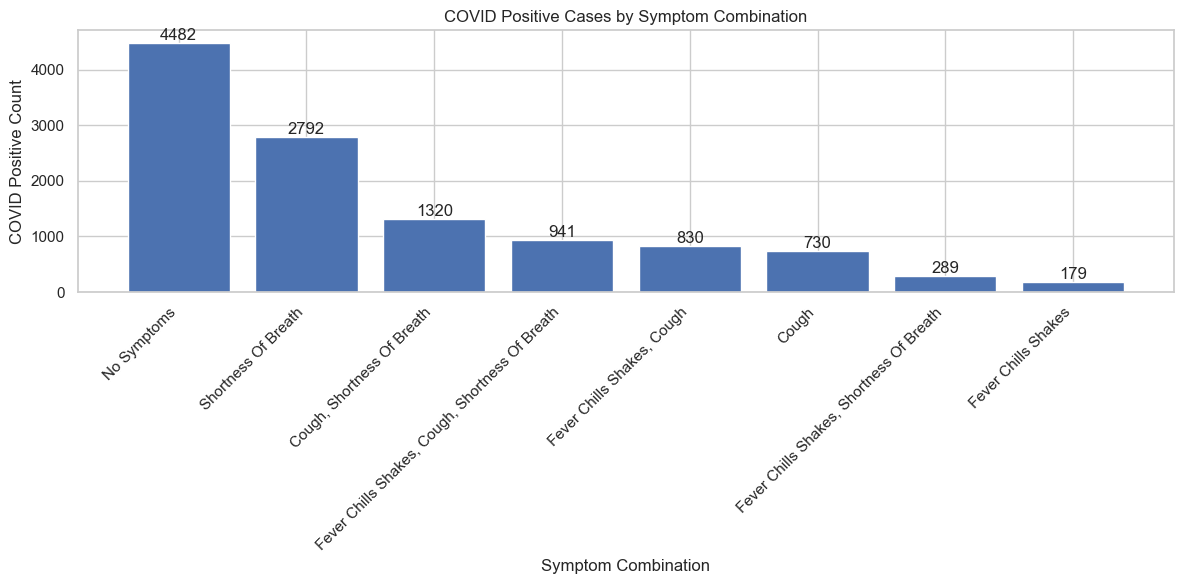

In [24]:
plt.figure(figsize=(12, 6))

bars = plt.bar(
    covid_positive_counts['Symptom Combination'],
    covid_positive_counts['COVID Positive Count']
)

# Labels & title
plt.xlabel('Symptom Combination')
plt.ylabel('COVID Positive Count')
plt.title('COVID Positive Cases by Symptom Combination')

# Rotate x labels
plt.xticks(rotation=45, ha='right')

# Add count labels on each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()


#Insight
Most COVID-positive cases are asymptomatic, while among symptomatic individuals, shortness of breath—alone or combined with cough and fever—shows the strongest association with COVID positivity.


In [25]:
df_demo.columns

Index(['month', 'fsa', 'probable', 'vulnerable', 'is_most_recent',
       'fever_chills_shakes', 'cough', 'shortness_of_breath',
       'any_medical_conditions', 'travel_outside_canada',
       'contact_with_illness', 'age_1', 'age_binary', 'symptom_count',
       'symptom_label', 'Symptom Combination'],
      dtype='object')

In [ ]:
#Question 4
how many people identify a high-risk COVID profile?

In [26]:
# Identify high-risk COVID profiles
high_risk_df = df_demo[
    (df_demo['probable'] == 1) &
    (
        (df_demo['vulnerable'] == 1) |
        (df_demo['symptom_count'] >= 2)
    )
]

# Number of high-risk individuals
high_risk_count = high_risk_df.shape[0]

high_risk_count

6216

In [27]:
total_people = df_demo.shape[0]

high_risk_percentage = (high_risk_count / total_people) * 100

high_risk_percentage

2.6014354767833603

# KPI: High-Risk COVID Profiles

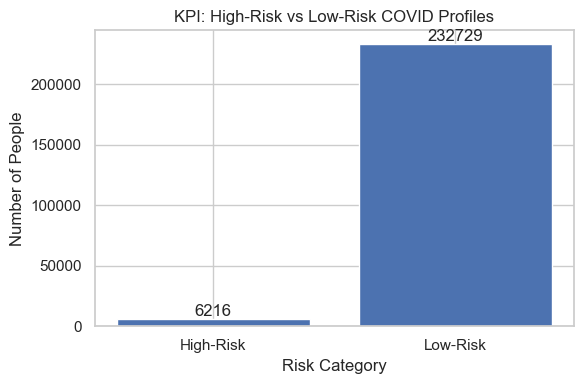

In [29]:
total_people = df_demo.shape[0]

# High-risk count (your KPI logic)
high_risk_count = df_demo[
    (df_demo['probable'] == 1) &
    (
        (df_demo['vulnerable'] == 1) |
        (df_demo['symptom_count'] >= 2)
    )
].shape[0]

# Low-risk count
low_risk_count = total_people - high_risk_count

# Data for plotting
labels = ['High-Risk', 'Low-Risk']
counts = [high_risk_count, low_risk_count]

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, counts)

plt.xlabel('Risk Category')
plt.ylabel('Number of People')
plt.title('KPI: High-Risk vs Low-Risk COVID Profiles')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()


In [ ]:
# KPI Insight 

This KPI visualization highlights the distribution of high-risk versus low-risk COVID profiles, showing the proportion of individuals who may require prioritized medical attention.

In [ ]:
#Question 5
How many people create a simple COVID risk score that predicts positivity?

In [ ]:
#Reasoning: How to create a simple COVID risk score

To build a simple, interpretable risk score, we use key risk indicators already present in the dataset. Each indicator contributes one point if present.

In [30]:
# Create simple COVID risk score
df_demo['covid_risk_score'] = (
    df_demo['fever_chills_shakes'] +
    df_demo['cough'] +
    df_demo['shortness_of_breath'] +
    df_demo['contact_with_illness'] +
    df_demo['travel_outside_canada'] +
    df_demo['any_medical_conditions']
)

In [31]:
#Risk score ≥ 2 → predicted COVID positive
df_demo['predicted_positive'] = (df_demo['covid_risk_score'] >= 2).astype(int)

In [32]:
predicted_positive_count = df_demo['predicted_positive'].sum()
predicted_positive_count

np.int64(9571)

In [33]:
pd.crosstab(
    df_demo['predicted_positive'],
    df_demo['probable'],
    rownames=['Predicted'],
    colnames=['Actual']
)


Actual,0,1
Predicted,,
0,224912,4462
1,2470,7101


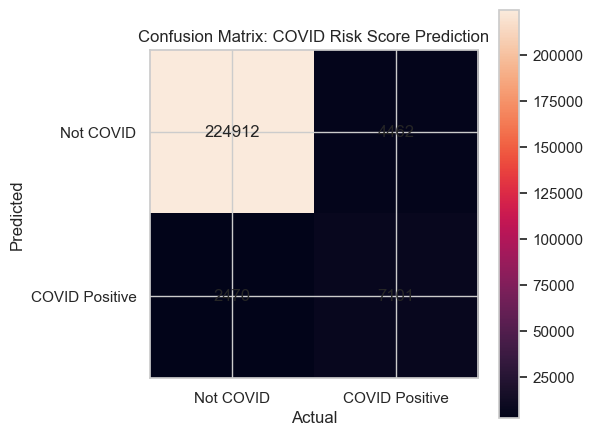

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create confusion matrix again (if not already saved)
cm = pd.crosstab(
    df_demo['predicted_positive'],
    df_demo['probable']
)

# Convert to numpy array
cm_values = cm.values
# Labels
labels = ['Not COVID', 'COVID Positive']

plt.figure(figsize=(6, 5))
plt.imshow(cm_values)

plt.title('Confusion Matrix: COVID Risk Score Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.xticks([0, 1], labels)
plt.yticks([0, 1], labels)

# Add numbers inside cells
for i in range(2):
    for j in range(2):
        plt.text(
            j, i,
            cm_values[i, j],
            ha='center',
            va='center',
            fontsize=12
        )

plt.colorbar()
plt.tight_layout()
plt.show()


In [ ]:
# Insight
The confusion matrix shows that the risk score correctly identifies a large number of non-COVID cases, indicating strong performance in ruling out low-risk individuals. It also successfully detects many COVID-positive cases, but a noticeable number of positives are missed, suggesting the model prioritizes simplicity over sensitivity. This highlights a trade-off where the risk score is effective for broad screening but may require threshold tuning to reduce missed positive cases.

In [35]:
df_symp = pd.read_excel(
    r"C:\Users\varle\Downloads\final clean data for py_hac\cleaned_schema_2_data_Final.xlsx"
)
df_symp.head()

,month,fsa,probable,vulnerable,is_most_recent,fever_chills_shakes,cough,shortness_of_breath,any_medical_conditions,travel_outside_canada,contact_with_illness,symptoms,conditions,ethnicity,sex,needs,age_1_26-44,age_1_45-64,age_1_<26,age_1_>65
0,April,M1P,0,0,y,0,0,0,1,0,0,none,none,none,m,none,0,1,0,0
1,April,N2P,0,1,y,0,0,0,1,0,0,runnyNose,highBloodPressure,asian,m,other,0,1,0,0
2,April,M4P,0,0,y,0,0,0,1,0,0,none,none,caucasian,f,emotionalSupport,1,0,0,0
3,April,L4N,0,0,y,0,0,0,1,0,0,none,none,caucasian,f,emotionalSupport,1,0,0,0
4,April,M4S,0,0,y,0,0,0,1,0,0,soreThroat;runnyNose,none,none,f,none,0,1,0,0


In [37]:
df_symp.columns

Index(['month', 'fsa', 'probable', 'vulnerable', 'is_most_recent',
       'fever_chills_shakes', 'cough', 'shortness_of_breath',
       'any_medical_conditions', 'travel_outside_canada',
       'contact_with_illness', 'symptoms', 'conditions', 'ethnicity', 'sex',
       'needs', 'age_1_26-44', 'age_1_45-64', 'age_1_<26', 'age_1_>65'],
      dtype='object')

In [ ]:
#Question 6: How many people spread COVID without feeling unwell?
or 
Are most COVID-positive people actually feeling sick or not?

In [ ]:
#Reasoning
we compare COVID positivity with self-reported symptoms.

In [ ]:
# Check unique values

In [38]:
df_symp["probable"].value_counts()
df_symp["symptoms"].value_counts()

symptoms
none                                                                  10340
runnyNose                                                               390
soreThroat                                                              285
cough                                                                    97
diarrhea                                                                 89
                                                                      ...  
fever;chills;shortnessOfBreath;runnyNose;soreThroat;cough                 1
fever;chills;shakes;shortnessOfBreath;soreThroat                          1
runnyNose;soreThroat;diarrhea                                             1
fever;cough;runnyNose                                                     1
fever;chills;cough;shortnessOfBreath;diarrhea;runnyNose;soreThroat        1
Name: count, Length: 188, dtype: int64

In [ ]:
#Clean and standardize

In [39]:
df_symp["probable"] = df_symp["probable"].astype(str).str.lower()
df_symp["symptoms"] = df_symp["symptoms"].astype(str).str.lower()

In [ ]:
# Filter asymptomatic COVID spreaders

In [40]:
asymptomatic_spreaders = df_symp[
    (df_symp["probable"].isin(["1", "yes", "true"])) &
    (df_symp["symptoms"].isin(["0", "no", "false"]))
]

Numeric output

In [41]:
count_asymptomatic_spreaders = asymptomatic_spreaders.shape[0]
count_asymptomatic_spreaders

0

In [42]:
total_probable_cases = df_symp[df_symp["probable"].isin(["1", "yes", "true"])].shape[0]

percentage_asymptomatic = (
    count_asymptomatic_spreaders / total_probable_cases
) * 100

percentage_asymptomatic

0.0

In [ ]:
#Question 7
What percentage of individuals reporting shortness of breath are probable COVID-19 cases?”


In [43]:
# Standardize values
df_symp["shortness_of_breath"] = df_symp["shortness_of_breath"].astype(str).str.lower()
df_symp["probable"] = df_symp["probable"].astype(str).str.lower()

# People with breathing problems
breathing = df_symp[df_symp["shortness_of_breath"].isin(["1", "yes", "true"])]

# COVID-positive among them
covid_positive = breathing[breathing["probable"].isin(["1", "yes", "true"])]

# Numeric value: percentage
percentage_covid_positive = (covid_positive.shape[0] / breathing.shape[0]) * 100

percentage_covid_positive

27.604166666666668

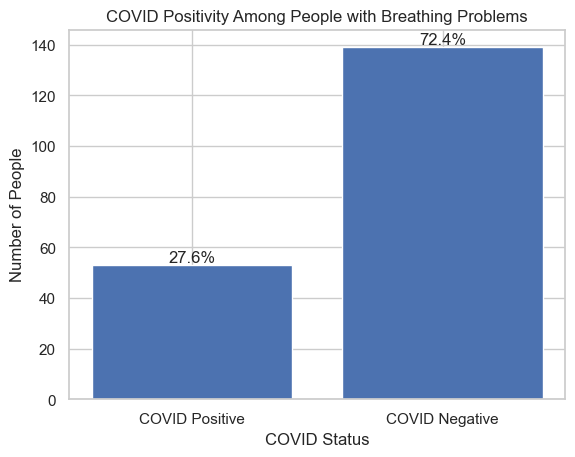

In [45]:
# Standardize values
df_symp["shortness_of_breath"] = df_symp["shortness_of_breath"].astype(str).str.lower()
df_symp["probable"] = df_symp["probable"].astype(str).str.lower()

# Filter people with breathing problems
breathing = df_symp[df_symp["shortness_of_breath"].isin(["1", "yes", "true"])]

# Counts
covid_positive_count = breathing[breathing["probable"].isin(["1", "yes", "true"])].shape[0]
covid_negative_count = breathing.shape[0] - covid_positive_count

total = breathing.shape[0]

labels = ["COVID Positive", "COVID Negative"]
values = [covid_positive_count, covid_negative_count]
percentages = [(v / total) * 100 for v in values]

# Plot
plt.figure()
bars = plt.bar(labels, values)

plt.xlabel("COVID Status")
plt.ylabel("Number of People")
plt.title("COVID Positivity Among People with Breathing Problems")

# Add percentage labels on bars
for bar, pct in zip(bars, percentages):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{pct:.1f}%",
        ha="center",
        va="bottom"
    )

plt.show()


In [ ]:
# Question 8
What percentage and number of individuals with travel history or contact with sick persons are probable COVID-19 cases?”


In [ ]:
# Reasoning 
COVID-19 transmission risk increases with exposure, particularly through:

Recent travel, and

Close contact with infected or sick individuals

To quantify this risk, we focus on individuals who report at least one exposure factor.

In [46]:
# Standardize values
df_symp["travel_outside_canada"] = df_symp["travel_outside_canada"].astype(str).str.lower()
df_symp["contact_with_illness"] = df_symp["contact_with_illness"].astype(str).str.lower()
df_symp["probable"] = df_symp["probable"].astype(str).str.lower()

# People with travel history OR contact with illness
exposed_group = df_symp[
    (df_symp["travel_outside_canada"].isin(["1", "yes", "true"])) |
    (df_symp["contact_with_illness"].isin(["1", "yes", "true"]))
]

# COVID-positive among them
covid_positive_exposed = exposed_group[
    exposed_group["probable"].isin(["1", "yes", "true"])
]

# Numeric outputs
number_covid_positive = covid_positive_exposed.shape[0]
total_exposed = exposed_group.shape[0]

percentage_covid_positive = (number_covid_positive / total_exposed) * 100

number_covid_positive, percentage_covid_positive


(157, 82.63157894736842)

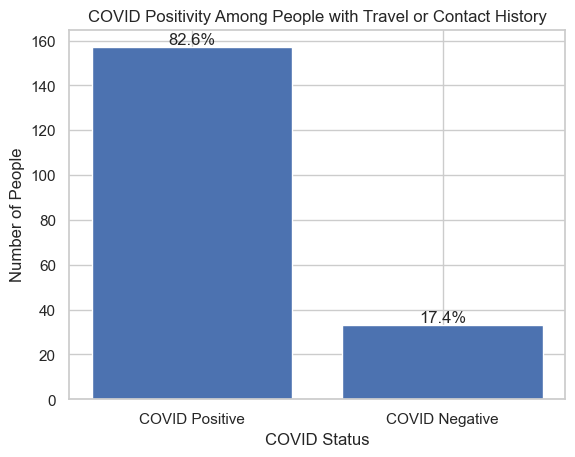

In [47]:
# Standardize values
df_symp["travel_outside_canada"] = df_symp["travel_outside_canada"].astype(str).str.lower()
df_symp["contact_with_illness"] = df_symp["contact_with_illness"].astype(str).str.lower()
df_symp["probable"] = df_symp["probable"].astype(str).str.lower()

# People with travel history OR contact with illness
exposed_group = df_symp[
    (df_symp["travel_outside_canada"].isin(["1", "yes", "true"])) |
    (df_symp["contact_with_illness"].isin(["1", "yes", "true"]))
]

# Counts
covid_positive = exposed_group[exposed_group["probable"].isin(["1", "yes", "true"])].shape[0]
covid_negative = exposed_group.shape[0] - covid_positive
total = exposed_group.shape[0]

# Data
labels = ["COVID Positive", "COVID Negative"]
values = [covid_positive, covid_negative]
percentages = [(v / total) * 100 for v in values]

# Plot
plt.figure()
bars = plt.bar(labels, values)

plt.xlabel("COVID Status")
plt.ylabel("Number of People")
plt.title("COVID Positivity Among People with Travel or Contact History")

# Add % labels
for bar, pct in zip(bars, percentages):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{pct:.1f}%",
        ha="center",
        va="bottom"
    )

plt.show()

In [ ]:
#Insight: COVID Positivity and Exposure History

The bar chart shows that approximately 82.6% of individuals with travel history or contact with sick persons are classified as probable COVID-19 cases, while only 17.4% are COVID negative.

This strong imbalance indicates that recent travel or contact with infected individuals is highly associated with COVID positivity, reinforcing exposure history as a critical risk factor in identifying potential COVID cases.

#Question 9
How many COVID-positive cases are asymptomatic and would be missed by symptom-based screening?

# Reasoning 
Symptom-based screening is commonly used to detect COVID-19 cases. However, not all COVID-positive individuals report symptoms. These asymptomatic individuals can still spread the virus.

In [48]:
# Standardize values
df_symp["probable"] = df_symp["probable"].astype(str).str.lower()
df_symp["symptoms"] = df_symp["symptoms"].astype(str).str.lower()

# All COVID-positive individuals
covid_positive = df_symp[df_symp["probable"].isin(["1", "yes", "true"])]

# Asymptomatic COVID-positive individuals
missed_cases = covid_positive[covid_positive["symptoms"].isin(["0", "no", "false"])]

# Numeric outputs
number_missed = missed_cases.shape[0]
total_covid_positive = covid_positive.shape[0]

percentage_missed = (number_missed / total_covid_positive) * 100

number_missed, percentage_missed

(0, 0.0)

In [2]:
import pandas as pd

df_demo = pd.read_excel(
    r"C:\Users\varle\Downloads\final clean data for py_hac\cleaned_schema_1_data_Final (1).xlsx"
)
df_demo.head()

,month,fsa,probable,vulnerable,is_most_recent,fever_chills_shakes,cough,shortness_of_breath,any_medical_conditions,travel_outside_canada,contact_with_illness,age_1,age_binary
0,April,L4C,0,0,1,0,0,0,0,0,0,<65,0
1,April,P1H,1,1,1,0,0,0,1,0,1,>65,1
2,April,N2J,0,1,1,0,0,0,0,0,0,>65,1
3,April,N1G,0,0,1,0,0,0,0,0,0,<65,0
4,April,L3M,0,0,1,0,0,0,0,0,0,<65,0


In [6]:
import pandas as pd

df_test = pd.read_excel(
    r"C:\Users\varle\Downloads\final clean data for py_hac\cleaned_schema_3_data_Final.xlsx"
)
df_test.head()

,month,fsa,probable,vulnerable,fever_chills_shakes,cough,shortness_of_breath,any_medical_conditions,travel_outside_canada,contact_with_illness,...,symp_other,symp_runnyNose,symp_shakes,symp_shortnessOfBreath,symp_soreThroat,symp_stomachPainCramps,age_1_26-44,age_1_45-64,age_1_<26,age_1_>65
0,April,M4P,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,April,M9P,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,April,K0L,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,April,N9E,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,April,L2N,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Question 10
 How does the number of symptoms a person has predict whether they are COVID-positive?

In [ ]:
#Reasoning: 

The number of symptoms a person reports reflects the overall burden of illness. As the symptom count increases, it indicates a stronger physiological response to infection, which raises the likelihood of COVID positivity. Individuals with few or no symptoms often include non-COVID cases or asymptomatic carriers, while those reporting multiple symptoms—especially respiratory symptoms—show a noticeably higher rate of positive COVID tests. Therefore, symptom count serves as a simple yet effective predictor of COVID risk, even without advanced medical testing.

In [7]:
symptom_cols = [
    c for c in ['fever_chills_shakes', 'cough', 'shortness_of_breath']
    if c in df_test.columns
]

df_test['symptom_score'] = df_test[symptom_cols].sum(axis=1)

df_test.groupby('symptom_score')['probable'].mean()

symptom_score
0    0.006896
1    0.086957
2    0.302521
3    0.771429
Name: probable, dtype: float64

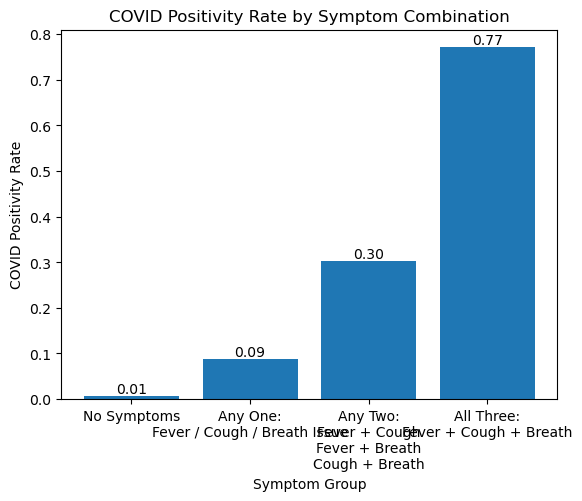

In [12]:
import matplotlib.pyplot as plt

# Calculate positivity rate
positivity_by_score = df_test.groupby('symptom_score')['probable'].mean()

# Detailed symptom labels
symptom_labels = {
    0: 'No Symptoms',
    1: 'Any One:\nFever / Cough / Breath Issue',
    2: 'Any Two:\nFever + Cough\nFever + Breath\nCough + Breath',
    3: 'All Three:\nFever + Cough + Breath'
}

x_labels = [symptom_labels[i] for i in positivity_by_score.index]

# Plot
plt.figure()
bars = plt.bar(x_labels, positivity_by_score.values)

plt.title('COVID Positivity Rate by Symptom Combination')
plt.xlabel('Symptom Group')
plt.ylabel('COVID Positivity Rate')

# Add numeric labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom'
    )

plt.show()

In [ ]:
# Insifgt
COVID positivity increases sharply as symptoms occur together. Individuals with no symptoms show very low positivity (~1%), while those with all three symptoms—fever, cough, and breathing difficulty—have a very high positivity rate (~77%). This indicates that symptom clustering is a strong predictor of COVID infection and more informative than single symptoms alone